In [1]:
words  = open('names.txt', 'r').read().splitlines()
#  reading the text file
words[0:5]

['emma', 'olivia', 'ava', 'isabella', 'sophia']

In [2]:
a= [len(w) for w in words]


In [3]:
# trying bi-gram language model for the first word

# without hallucination
print ("\nwithout start and end character \n")
for ele in words[0:1]:
    for a,b in zip(ele,ele[1:]):
        print (a,b)


print ("\nwith start and end character \n")
# with hallucinatios
for ele in words[0:1]:
    full = ['<s>'] + list(ele) + ['<e>'] #this is to hallucinate to start and end the word
    for a,b in zip(full,full[1:]):
        print (a,b)



without start and end character 

e m
m m
m a

with start and end character 

<s> e
e m
m m
m a
a <e>


In [4]:
bi_count = {}

for ele in words:
    full = ['<s>'] + list(ele) + ['<e>'] #this is to hallucinate to start and end the word
    for a,b in zip(full,full[1:]):
        bi_count[(a,b)] = bi_count.get((a,b),0) + 1;
        # print (a,b)


# bi_count.items() will give us the tuple of key,value of dictionary
sorted(bi_count.items(),key = lambda k:-k[1])   #negative sign is to sort the values in descending order according to index 1
bi_count


{('<s>', 'e'): 1531,
 ('e', 'm'): 769,
 ('m', 'm'): 168,
 ('m', 'a'): 2590,
 ('a', '<e>'): 6640,
 ('<s>', 'o'): 394,
 ('o', 'l'): 619,
 ('l', 'i'): 2480,
 ('i', 'v'): 269,
 ('v', 'i'): 911,
 ('i', 'a'): 2445,
 ('<s>', 'a'): 4410,
 ('a', 'v'): 834,
 ('v', 'a'): 642,
 ('<s>', 'i'): 591,
 ('i', 's'): 1316,
 ('s', 'a'): 1201,
 ('a', 'b'): 541,
 ('b', 'e'): 655,
 ('e', 'l'): 3248,
 ('l', 'l'): 1345,
 ('l', 'a'): 2623,
 ('<s>', 's'): 2055,
 ('s', 'o'): 531,
 ('o', 'p'): 95,
 ('p', 'h'): 204,
 ('h', 'i'): 729,
 ('<s>', 'c'): 1542,
 ('c', 'h'): 664,
 ('h', 'a'): 2244,
 ('a', 'r'): 3264,
 ('r', 'l'): 413,
 ('l', 'o'): 692,
 ('o', 't'): 118,
 ('t', 't'): 374,
 ('t', 'e'): 716,
 ('e', '<e>'): 3983,
 ('<s>', 'm'): 2538,
 ('m', 'i'): 1256,
 ('a', 'm'): 1634,
 ('m', 'e'): 818,
 ('<s>', 'h'): 874,
 ('r', 'p'): 14,
 ('p', 'e'): 197,
 ('e', 'r'): 1958,
 ('r', '<e>'): 1377,
 ('e', 'v'): 463,
 ('v', 'e'): 568,
 ('l', 'y'): 1588,
 ('y', 'n'): 1826,
 ('n', '<e>'): 6763,
 ('b', 'i'): 217,
 ('i', 'g'): 428,


In [5]:
print(len(bi_count))

627


In [2]:
from utils import str_to_int , int_to_str ,generator ,get_bigram_counts,bigram_visualization, prediction_from_distribution, samples_from_distribution,different_quality_measures,print_probabilities_of_each_pair,input_output_for_neural_network,tuning_parameters,sampling_from_neural_netwok

hello


below is for space optimization because no pair will start with end character and no pair will end with start character

In [3]:
s = sorted(list(set(''.join(words))))
print(s)
stoi = str_to_int(s)
print(stoi)
itos = int_to_str(stoi)
print(itos)

count_array = get_bigram_counts(words,27,stoi)
print(count_array)





['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
{'a': 1, 'b': 2, 'c': 3, 'd': 4, 'e': 5, 'f': 6, 'g': 7, 'h': 8, 'i': 9, 'j': 10, 'k': 11, 'l': 12, 'm': 13, 'n': 14, 'o': 15, 'p': 16, 'q': 17, 'r': 18, 's': 19, 't': 20, 'u': 21, 'v': 22, 'w': 23, 'x': 24, 'y': 25, 'z': 26, '.': 0}
{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}
tensor([[   0, 4410, 1306, 1542, 1690, 1531,  417,  669,  874,  591, 2422, 2963,
         1572, 2538, 1146,  394,  515,   92, 1639, 2055, 1308,   78,  376,  307,
          134,  535,  929],
        [6640,  556,  541,  470, 1042,  692,  134,  168, 2332, 1650,  175,  568,
         2528, 1634, 5438,   63,   82,   60, 3264, 1118,  687,  381,  834,  161,
          182, 2050,  435],
        [ 114,  321, 

table with dimension 27*27




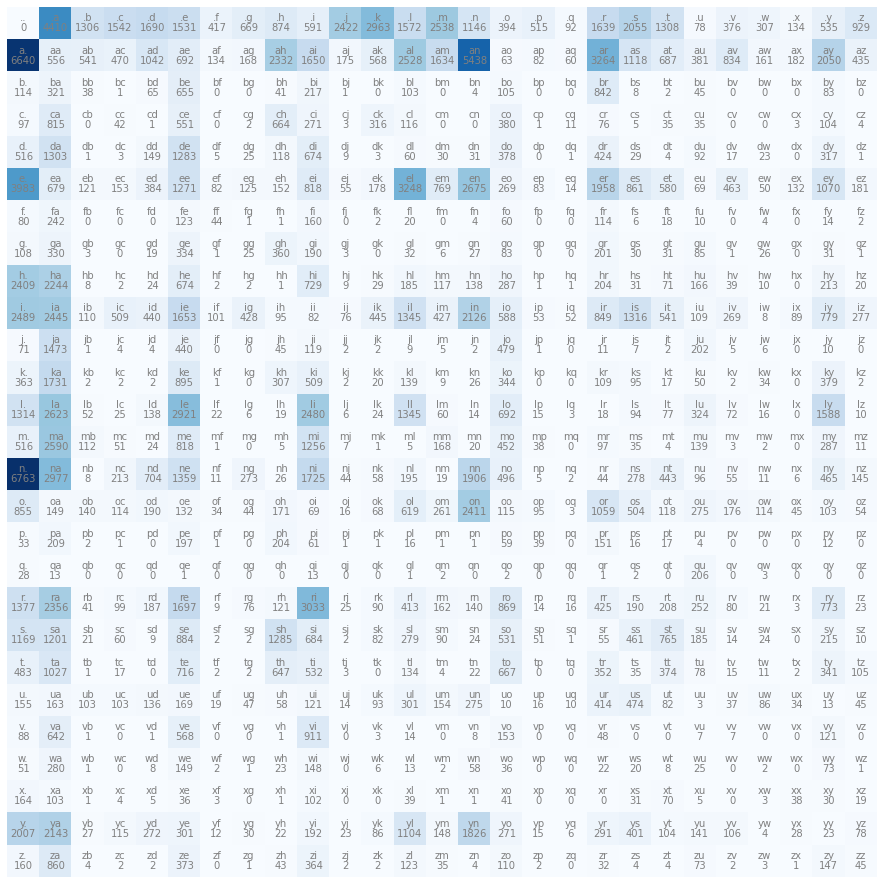

In [10]:



print("table with dimension 27*27")
bigram_visualization(count_array,itos,27)
print("\n")




count array with dimension 28

{'a': 1, 'b': 2, 'c': 3, 'd': 4, 'e': 5, 'f': 6, 'g': 7, 'h': 8, 'i': 9, 'j': 10, 'k': 11, 'l': 12, 'm': 13, 'n': 14, 'o': 15, 'p': 16, 'q': 17, 'r': 18, 's': 19, 't': 20, 'u': 21, 'v': 22, 'w': 23, 'x': 24, 'y': 25, 'z': 26, '<s>': 0, '<e>': 27}
{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '<s>', 27: '<e>'}


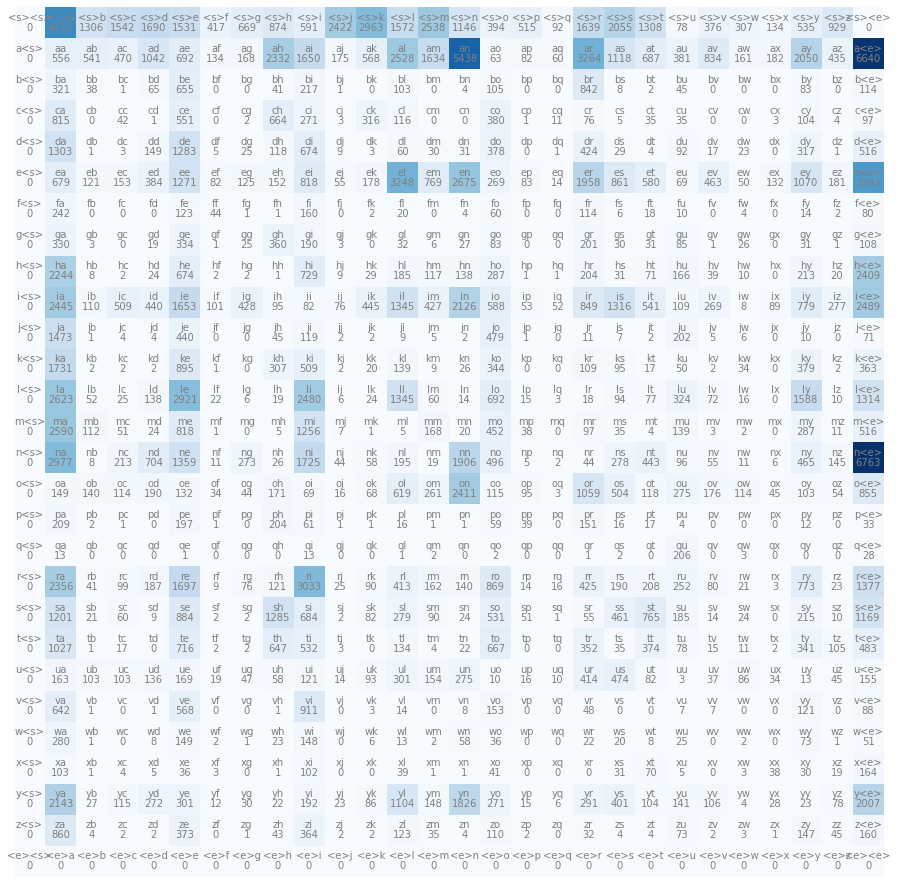

In [14]:
print("count array with dimension 28\n")
stoi_28 = str_to_int(s,False)
print(stoi_28)
itos_28 = int_to_str(stoi_28)
print(itos_28)
count_array_28 = get_bigram_counts(words,28,stoi_28)
bigram_visualization(count_array_28,itos_28,28)

rough work

In [4]:
import torch
# from utils import generator , prediction_from_distribution, samples_from_distribution,different_quality_measures,print_probabilities_of_each_pair,input_output_for_neural_network

seed_value =2147483647

g = generator(seed_value)
ss= torch.rand(3,generator=g)
print(ss)  #these are the probabilities of occurence of index number


prediction = prediction_from_distribution(ss,30,g)
print(prediction)


tensor([0.2673, 0.8725, 0.3353])
tensor([1, 1, 1, 1, 2, 1, 0, 0, 2, 1, 1, 1, 1, 0, 2, 1, 2, 1, 2, 2, 1, 1, 0, 1,
        1, 0, 1, 1, 0, 0])


In [12]:
M= count_array[0].float()
print(M)

M=M/M.sum()
print(M)

print(prediction_from_distribution(M,1,g))




tensor([   0., 4410., 1306., 1542., 1690., 1531.,  417.,  669.,  874.,  591.,
        2422., 2963., 1572., 2538., 1146.,  394.,  515.,   92., 1639., 2055.,
        1308.,   78.,  376.,  307.,  134.,  535.,  929.])
tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])
tensor([12])


In [5]:

#below is taking the sample from the model i.e sampling new names according to the distribution


samples_from_distribution(20,count_array,itos,generator=g)


l.
khialolerar.
zananibrig.
bleianey.
e.
vaamale.
morina.
igh.
a.
bra.
ca.
ahanaroushie.
rananusengua.
lonaniyl.
reren.
s.
rosufoh.
mmyssonn.
sarelya.
eri.


In [6]:
# looking at the probabilities that our model assign to every one of these bigrams
print_probabilities_of_each_pair(words,count_array,stoi)
        

.e : 0.0478
em : 0.0377
mm : 0.0253
ma : 0.3899
a. : 0.1960
.o : 0.0123
ol : 0.0780
li : 0.1777
iv : 0.0152
vi : 0.3541
ia : 0.1381
a. : 0.1960
.a : 0.1377
av : 0.0246
va : 0.2495
a. : 0.1960


In [8]:
# looking at the probabilities that our model assign to every one of these bigrams


different_quality_measures(words,count_array,stoi)

log_likelihood=tensor(1610948.5000)
nll=tensor(-1610948.5000)
average of negative log likelihood =  tensor(-7.0610)


there are 27 characters and 1/27 = 0.04 i.e 4 percent . if everything was equally likely then you would expect all the probabilities to 4%. so if anything above 4 percent that means that we have learned something from these bigram statistics
if we have a very good model , we wwould expect that these probabilities should be near 1 because that means your model is correctly predicting what is going to come next especially on the training set.
Now question is how can we summarise above probabilities into a single number that measures the quality of this model. likelihood is the product of all of these probabilities and so the product of all these probabilities is the likelihood and it's really telling us about the probability of the entire data set assigned by the model that we've trained and that is a measure of quality so the product of these should be as high as possible when you are training the model and when you have a good model yourproduct of these probabilities should be very high.

# Log Likelihood=log(Likelihood)
# Log Likelihood=log(P1)+log(P2)+…+log(Pn)

Maximum vaue of log_likelihood can be 0 and it will be when all the probabilities are 1 (log(1)=0) . if the probabilities are lower and lower then the log likelihood will become more and more negative we don't actually like this because what we'd like is a loss functionand a loss function has the semantics that low is good because we're trying to minimize the loss so we actually need to invert this and that's what gives us something called  the negative log likelihood negative log likelihood is just negative of the log likelihood.
The negative log likelihood is a very nice loss function.the lowest it can get is zero and the higher it is the worse off the predictions are that you're making . the lower this negaticve log likelihood is the , the better the model is because it is giving high probabilities to the actual next characters in all the bi-grams in our training set
we can also use avergae of negative of log likelihood as a measure. it summarizes the quality of the model


# GOAL: maximize likelihood of the data w.r.t. model parameters (statistical modeling)
# equivalent to maximizing the log likelihood (because log is monotonic)
# equivalent to minimizing the negative log likelihood
# equivalent to minimizing the average negative log likelihood
# log (a*b*c) = log(a) + log(b) + log(c)


if a pair count is 0 then the probability will be 0 using above approach and log(0) will be negative infinity , to avoid this we can use "model smootheing" approach which add fake counts to avoid this problem. we can add 1 to each pair initally . the larger number we add , the more uniform model we are going to get. the less we add, the more peaked model we are going to have . Now we can not have negative infinity


//improvement
solution is these numbers/parameters/probabilities will not be kept explicitly but these numbers will be calculated by a neural network .we want to change and tune the parameters of these neural networks to maximize the likelihood.
it receives a single character as an input and then there's neural network with some weights or some or some parameters w and it's going to output the probability distribution over the next character in a sequence it's going to make guesses as to what is likely to follow this this character that was input to the model. in addition to that we're going to be able to evaluate any setting of the parameters of the neural net  because we have the loss function(the negative log likelihood ).
we're going to use gradient-based optimization then to tune the parameters of this network because we have the loss function and we're going to minimize it so we're going to tune the weights so that the neural net is correctlypredicting the probabilities for the
next character



Below is the implementation of model soothening with fake counts

In [5]:

temp = (count_array+1).float()
temp/=temp.sum(1,keepdim=True)

different_quality_measures(words,temp,stoi)


log_likelihood=tensor(-559951.5625)
nll=tensor(559951.5625)
average of negative log likelihood =  tensor(2.4544)


Forming new names

In [13]:
samples_from_distribution(10,temp,itos,generator=g)



l.
khialolerar.
zananibrig.
bleianey.
e.
vaamale.
morina.
igh.
a.
bra.


In [6]:
import torch

Neural Network

In [7]:


inp,out = input_output_for_neural_network(words,stoi)
W= torch.rand((27,27),generator=g,requires_grad=True)


total number of input to neural network 228146


In [8]:

import torch.nn.functional as F 
tuning_parameters(inp,out,W)



3.3050103187561035
3.0549237728118896
2.9069087505340576
2.8184895515441895
2.7576568126678467
2.7138612270355225
2.6811952590942383
2.655989408493042
2.635936975479126
2.619570255279541
2.605933904647827
2.5943820476531982
2.5844640731811523
2.5758516788482666
2.5682997703552246


In [8]:
print(W)

tensor([[-1.0433e+00,  2.1680e+00,  9.2396e-01,  1.0961e+00,  1.1883e+00,
          1.0884e+00, -1.2496e-01,  2.6747e-01,  4.7903e-01,  1.2300e-01,
          1.5607e+00,  1.7659e+00,  1.1160e+00,  1.6085e+00,  7.8195e-01,
         -1.3533e-01, -5.9825e-05, -7.0223e-01,  1.1573e+00,  1.3922e+00,
          9.2033e-01, -7.3010e-01, -2.2342e-01, -3.4046e-01, -7.5518e-01,
          8.5057e-02,  5.4455e-01],
        [ 2.7808e+00,  2.3540e-01,  1.9984e-01,  1.1657e-01,  8.6930e-01,
          4.5839e-01, -4.7904e-01, -4.3906e-01,  1.7197e+00,  1.3558e+00,
         -4.2034e-01,  2.3298e-01,  1.8025e+00,  1.3458e+00,  2.5797e+00,
         -6.9062e-01, -7.3529e-01, -7.0252e-01,  2.0632e+00,  9.4641e-01,
          4.1218e-01, -9.0511e-03,  6.2965e-01, -4.2952e-01, -5.1712e-01,
          1.5866e+00, -5.0064e-02],
        [ 2.5900e-01,  1.1882e+00,  6.2224e-01,  2.2860e-01,  1.8622e-01,
          1.9411e+00,  4.5864e-02, -6.4830e-03,  4.7979e-01,  1.1018e+00,
          1.2334e-01, -1.3422e-01,  6.68

sampling from neural network

In [9]:

sampling_from_neural_netwok(W,itos,g)

mancllirielsixn.
janinenanna.
ja.
nus.
ah.
vf.
uuzpg.
karriliuxnan.
zpr.
enwworerian.
